<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_cluster_data_add_delta_(_2_8)_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

In [32]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_-2.8'

In [34]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-2.8_n60.csv')

In [35]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,43.397732,68.596157,89.282447,30.421720,0.003531,241.701587,241.699095,0.002492
1,0.0,1.0,83.294725,35.671147,43.165323,90.225260,-0.009793,262.346662,262.354311,-0.007650
2,0.0,2.0,65.939362,34.549509,42.750636,83.048925,0.000626,236.289058,236.287517,0.001541
3,0.0,3.0,72.296970,33.827723,97.953638,22.067344,0.004172,236.149847,236.145542,0.004306
4,0.0,4.0,55.555330,21.652133,87.101326,30.547599,0.008645,204.865034,204.857203,0.007831
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,50.313073,25.701688,46.212330,42.388692,-0.013600,174.602183,174.620240,-0.018057
59996,999.0,56.0,41.026724,93.513932,74.700442,21.871653,0.000507,241.113260,241.112220,0.001040
59997,999.0,57.0,90.935659,33.549845,25.946182,96.950207,0.000999,257.382892,257.384190,-0.001298
59998,999.0,58.0,23.123742,48.312525,61.714003,31.090371,0.004808,174.245449,174.243979,0.001470


In [36]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y       y_hat     e_hat
rep   index                                                                                        
0.0   0.0    43.397732  68.596157  89.282447  30.421720  0.003531  241.701587  241.699095  0.002492
      1.0    83.294725  35.671147  43.165323  90.225260 -0.009793  262.346662  262.354311 -0.007650
      2.0    65.939362  34.549509  42.750636  83.048925  0.000626  236.289058  236.287517  0.001541
      3.0    72.296970  33.827723  97.953638  22.067344  0.004172  236.149847  236.145542  0.004306
      4.0    55.555330  21.652133  87.101326  30.547599  0.008645  204.865034  204.857203  0.007831
...                ...        ...        ...        ...       ...         ...         ...       ...
999.0 55.0   50.313073  25.701688  46.212330  42.388692 -0.013600  174.602183  174.620240 -0.018057
      56.0   41.026724  93.513932  74.700442  21.871653  0.000507  241.113260  241.112220  0.001040
      57.0   90.935659  33.549845  25.946182  96.950207  0.000999  257.382892  257.384190 -0.001298
      58.0   23.123742  48.312525  61.714003  31.090371  0.004808  174.245449  174.243979  0.001470
      59.0   56.635370  66.915720  52.673233  72.200259  0.002632  258.427214  258.425204  0.002010

[60000 rows x 8 columns]

In [37]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y       y_hat     e_hat
rep   index                                                                                        
0.0   0.0    43.397732  68.596157  89.282447  30.421720  0.003531  241.701587  241.699095  0.002492
      1.0    83.294725  35.671147  43.165323  90.225260 -0.009793  262.346662  262.354311 -0.007650
      2.0    65.939362  34.549509  42.750636  83.048925  0.000626  236.289058  236.287517  0.001541
      3.0    72.296970  33.827723  97.953638  22.067344  0.004172  236.149847  236.145542  0.004306
      4.0    55.555330  21.652133  87.101326  30.547599  0.008645  204.865034  204.857203  0.007831
...                ...        ...        ...        ...       ...         ...         ...       ...
999.0 55.0   50.313073  25.701688  46.212330  42.388692 -0.013600  174.602183  174.620240 -0.018057
      56.0   41.026724  93.513932  74.700442  21.871653  0.000507  241.113260  241.112220  0.001040
      57.0   90.935659  33.549845  25.946182  96.950207  0.000999  257.382892  257.384190 -0.001298
      58.0   23.123742  48.312525  61.714003  31.090371  0.004808  174.245449  174.243979  0.001470
      59.0   56.635370  66.915720  52.673233  72.200259  0.002632  258.427214  258.425204  0.002010

[60000 rows x 8 columns]

In [38]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,43.397732,68.596157,89.282447,30.421720,0.003531,241.701587,241.699095,0.002492
1,0.0,1.0,83.294725,35.671147,43.165323,90.225260,-0.009793,262.346662,262.354311,-0.007650
2,0.0,2.0,65.939362,34.549509,42.750636,83.048925,0.000626,236.289058,236.287517,0.001541
3,0.0,3.0,72.296970,33.827723,97.953638,22.067344,0.004172,236.149847,236.145542,0.004306
4,0.0,4.0,55.555330,21.652133,87.101326,30.547599,0.008645,204.865034,204.857203,0.007831
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,50.313073,25.701688,46.212330,42.388692,-0.013600,174.602183,174.620240,-0.018057
59996,999.0,56.0,41.026724,93.513932,74.700442,21.871653,0.000507,241.113260,241.112220,0.001040
59997,999.0,57.0,90.935659,33.549845,25.946182,96.950207,0.000999,257.382892,257.384190,-0.001298
59998,999.0,58.0,23.123742,48.312525,61.714003,31.090371,0.004808,174.245449,174.243979,0.001470


In [39]:
table.set_index(['rep', 'index'], inplace=True)

In [40]:
table

x1         x2         x3         x4         e           Y       y_hat     e_hat
rep   index                                                                                        
0.0   0.0    43.397732  68.596157  89.282447  30.421720  0.003531  241.701587  241.699095  0.002492
      1.0    83.294725  35.671147  43.165323  90.225260 -0.009793  262.346662  262.354311 -0.007650
      2.0    65.939362  34.549509  42.750636  83.048925  0.000626  236.289058  236.287517  0.001541
      3.0    72.296970  33.827723  97.953638  22.067344  0.004172  236.149847  236.145542  0.004306
      4.0    55.555330  21.652133  87.101326  30.547599  0.008645  204.865034  204.857203  0.007831
...                ...        ...        ...        ...       ...         ...         ...       ...
999.0 55.0   50.313073  25.701688  46.212330  42.388692 -0.013600  174.602183  174.620240 -0.018057
      56.0   41.026724  93.513932  74.700442  21.871653  0.000507  241.113260  241.112220  0.001040
      57.0   90.935659  33.549845  25.946182  96.950207  0.000999  257.382892  257.384190 -0.001298
      58.0   23.123742  48.312525  61.714003  31.090371  0.004808  174.245449  174.243979  0.001470
      59.0   56.635370  66.915720  52.673233  72.200259  0.002632  258.427214  258.425204  0.002010

[60000 rows x 8 columns]

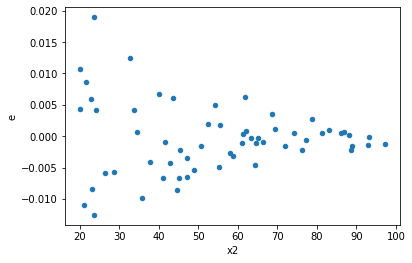

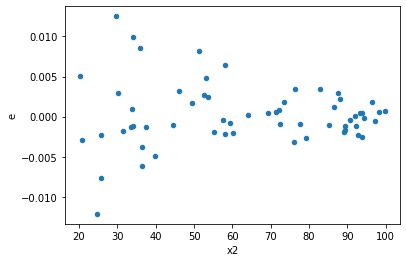

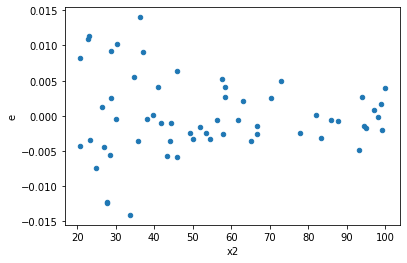

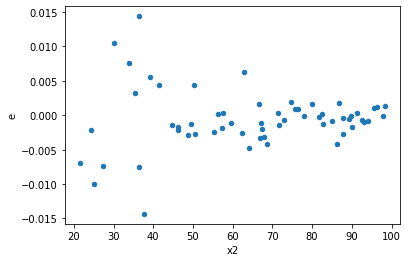

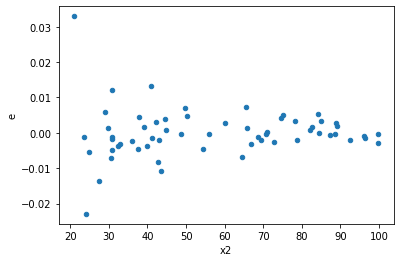

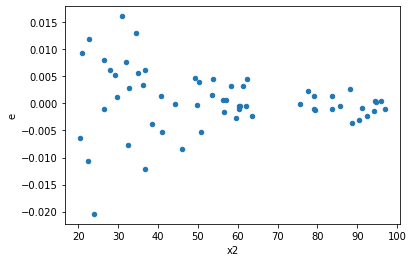

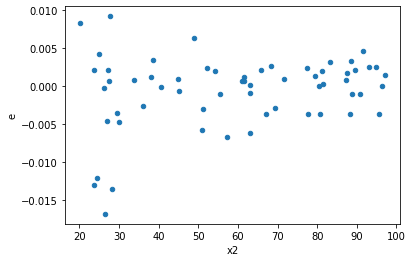

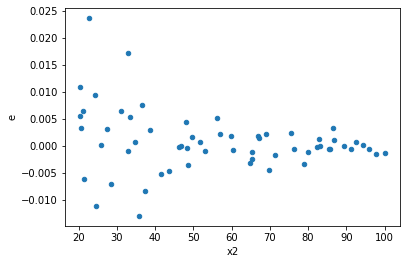

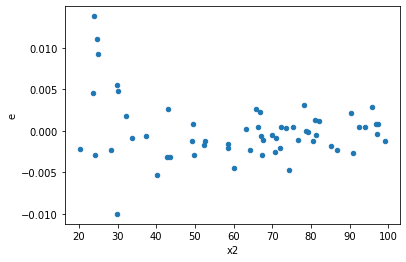

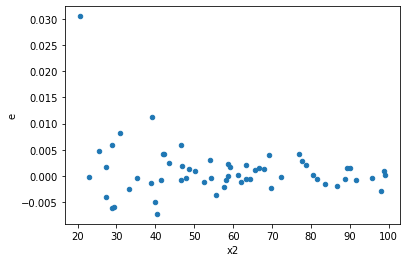

In [41]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [42]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3", "x4"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [43]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,33.0,19.0,0.00022336741923295042,0.00032035545508689246,6.76870967372577e-06,1.686081342562592e-05,2.4909937400735123,0.03882797995770049,0.9805860100211498,0.019413989978850243,Reject005=0 : Heteroscedasticity
2.0,19.0,33.0,0.00013516514721818062,0.00157635111837148,7.113955116746349e-06,4.776821570822667e-05,6.714719860374102,2.247428162682752e-06,0.9999988762859187,1.123714081341376e-06,Reject005=0 : Heteroscedasticity
7.0,26.0,26.0,0.0006948568780696644,0.0010159962691278217,2.672526454114094e-05,3.90767795818393e-05,1.4621662405505624,0.338816081900696,0.830591959049652,0.169408040950348,Reject005=1 : Homoscedasticity
9.0,34.0,18.0,0.00017209370064839088,0.0010997180533307276,5.0615794308350255e-06,6.109544740726264e-05,12.070431422071653,9.018153002138263e-07,0.9999995490923499,4.5090765010691314e-07,Reject005=0 : Heteroscedasticity
10.0,29.0,23.0,0.000314309320653404,0.0006155967867796921,1.0838252436324275e-05,2.676507768607357e-05,2.469501226634169,0.02928189358997213,0.9853590532050139,0.014640946794986065,Reject005=0 : Heteroscedasticity
12.0,29.0,23.0,0.0002879004295983219,0.0008527631539333095,9.927601020631789e-06,3.7076658866665635e-05,3.7347047680111234,0.0018657742292285118,0.9990671128853857,0.0009328871146142559,Reject005=0 : Heteroscedasticity
15.0,22.0,30.0,0.00031748504552687345,0.001561427000467565,1.4431138433039703e-05,5.204756668225217e-05,3.6066154395061907,0.001285175636016378,0.9993574121819918,0.000642587818008189,Reject005=0 : Heteroscedasticity
17.0,19.0,33.0,0.0005347390849375077,0.001042404644266676,2.8144162365131983e-05,3.158801952323261e-05,1.1223648838228437,0.749891932108234,0.625054033945883,0.374945966054117,Reject005=1 : Homoscedasticity
18.0,24.0,28.0,0.00012019284766538834,0.002163997889771244,5.008035319391181e-06,7.728563892040157e-05,15.432327048723185,3.038242990527351e-10,0.9999999998480879,1.5191214952636756e-10,Reject005=0 : Heteroscedasticity


In [44]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,19.0,33.0,0.00072440788179441,0.0007067785796858611,3.812673062075842e-05,2.1417532717753365e-05,0.561745850458324,0.18613570776534127,Reject005=1 : Homoscedasticity
1.0,33.0,19.0,0.00022336741923295042,0.00032035545508689246,6.76870967372577e-06,1.686081342562592e-05,2.4909937400735123,0.03882797995770049,Reject005=0 : Heteroscedasticity
2.0,19.0,33.0,0.00013516514721818062,0.00157635111837148,7.113955116746349e-06,4.776821570822667e-05,6.714719860374102,2.247428162682752e-06,Reject005=0 : Heteroscedasticity
3.0,30.0,22.0,0.0007132052779585458,7.574163661555874e-05,2.377350926528486e-05,3.442801664343579e-06,0.1448167212474143,2.2256606108131993e-06,Reject005=0 : Heteroscedasticity
4.0,25.0,27.0,0.0024218104202307854,0.00027426632144010837,9.687241680923142e-05,1.01580119051892e-05,0.10485969318999375,2.508803233153412e-07,Reject005=0 : Heteroscedasticity
5.0,29.0,23.0,0.0011977840371687272,0.0004702909917233122,4.130289783340439e-05,2.0447434422752704e-05,0.4950605283248554,0.07433267124812774,Reject005=1 : Homoscedasticity
6.0,25.0,27.0,0.0009390462256000726,0.00020845521194736208,3.7561849024002905e-05,7.720563405457856e-06,0.2055426877554466,0.00016177196673818859,Reject005=0 : Heteroscedasticity
7.0,26.0,26.0,0.0006948568780696644,0.0010159962691278217,2.672526454114094e-05,3.90767795818393e-05,1.4621662405505624,0.338816081900696,Reject005=1 : Homoscedasticity
8.0,15.0,37.0,0.0002959347451468887,9.312543072256799e-05,1.9728983009792582e-05,2.5169035330423783e-06,0.1275739115286936,0.00010511603006923614,Reject005=0 : Heteroscedasticity


In [45]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    591
Reject005=1 : Homoscedasticity      409
Name: Result_test, dtype: int64